In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVR #Our today's topic

In [3]:
dataset = pd.read_csv(r'C:\Users\User\Downloads\SVM\SVR\SVR_1d\50_Startups.csv') #Loading the data into DataFrame
dataset.head() #Displaying the data to make sure DataFrame is alright

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Questions

<font size=4>1. Take R&D Spend as Independent variable(X)

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
rnd_X = dataset.iloc[:,0:1]
profit_Y = dataset.iloc[:,4:]

<font size=4> 2. Create a model with Linear kernel and fit the data(X,Y)

In [5]:
scaleX = StandardScaler().fit_transform(rnd_X)
scaleY = StandardScaler().fit_transform(profit_Y)

NameError: name 'StandardScaler' is not defined

In [80]:
linearFit = SVR(kernel='linear').fit(scaleX,scaleY)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<font size=4>3. Visualize the scatters and model

<IPython.core.display.Javascript object>


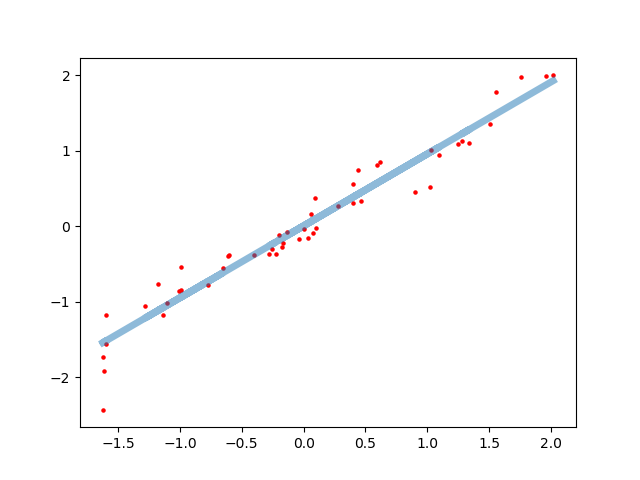

In [84]:
plt.scatter(scaleX,scaleY,c='red',label='Data',s=5)
plt.plot(scaleX,linearFit.predict(scaleX),label='Prediction',lw=5,alpha=0.5)

<font size=4>4. Compute the Score of the model

In [85]:
linearFit.score(scaleX,scaleY)

0.9461755773393699

In [107]:
y_pred = linearFit.predict(rnd_X)

In [111]:
y_pred = y_pred.reshape(-1,1)
y_pred

array([[1.57861991e+05],
       [1.55235082e+05],
       [1.46493496e+05],
       [1.37835056e+05],
       [1.35672551e+05],
       [1.25905358e+05],
       [1.28519912e+05],
       [1.24398076e+05],
       [1.15084212e+05],
       [1.17750131e+05],
       [9.72983363e+04],
       [9.61134157e+04],
       [8.96134898e+04],
       [8.78268673e+04],
       [1.14512069e+05],
       [1.09337846e+05],
       [7.44805862e+04],
       [9.03709732e+04],
       [8.75946510e+04],
       [8.25065155e+04],
       [7.28009972e+04],
       [7.48399042e+04],
       [7.06440011e+04],
       [6.44745797e+04],
       [7.35553682e+04],
       [6.17366181e+04],
       [7.19178919e+04],
       [6.88424849e+04],
       [6.30606317e+04],
       [6.26347889e+04],
       [5.91872994e+04],
       [5.83680552e+04],
       [6.05376345e+04],
       [5.29811214e+04],
       [4.43238461e+04],
       [4.39304542e+04],
       [2.73658352e+04],
       [4.20744141e+04],
       [1.93135748e+04],
       [3.68125388e+04],


In [112]:
invertedX = StandardScaler().fit(rnd_X).inverse_transform(scaleX)
invertedY = StandardScaler().fit(profit_Y).inverse_transform(scaleY)
inverted_pred_Y = StandardScaler().fit(y_pred).inverse_transform(scaleY)

In [100]:
print(invertedY)

[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54]
 [105008.31]
 [103282.38]
 [101004.64]
 [ 99937.59]
 [ 97483.56]
 [ 97427.84]
 [ 96778.92]
 [ 96712.8 ]
 [ 96479.51]
 [ 90708.19]
 [ 89949.14]
 [ 81229.06]
 [ 81005.76]
 [ 78239.91]
 [ 77798.83]
 [ 71498.49]
 [ 69758.98]
 [ 65200.33]
 [ 64926.08]
 [ 49490.75]
 [ 42559.73]
 [ 35673.41]
 [ 14681.4 ]]


In [114]:
print(inverted_pred_Y)

[[157636.04396726]
 [157125.27661045]
 [156318.8802345 ]
 [147459.36019223]
 [129286.6562304 ]
 [119287.21939431]
 [118342.80482165]
 [117940.61235946]
 [114090.77013875]
 [111424.98791956]
 [107469.48469083]
 [105444.38785528]
 [102537.15533717]
 [ 94623.81124678]
 [ 92770.34015846]
 [ 89850.35395004]
 [ 86671.05357809]
 [ 84906.89094005]
 [ 83707.11987075]
 [ 82087.04240232]
 [ 77408.69958367]
 [ 69622.7401784 ]
 [ 68578.12269877]
 [ 66818.63532657]
 [ 66620.80634521]
 [ 65372.94527402]
 [ 63556.33267687]
 [ 62767.81103823]
 [ 60891.25718391]
 [ 58414.73624961]
 [ 57254.56359472]
 [ 54586.36763363]
 [ 54525.78488649]
 [ 53820.23290747]
 [ 53748.34254063]
 [ 53494.69305967]
 [ 47219.70346535]
 [ 46394.41031723]
 [ 36913.31911771]
 [ 36670.53147529]
 [ 33663.30263173]
 [ 33183.72908351]
 [ 26333.55131817]
 [ 24442.23232196]
 [ 19485.74380388]
 [ 19187.5596976 ]
 [  2405.17106988]
 [ -5130.72684914]
 [-12618.02374884]
 [-35442.03009642]]


<IPython.core.display.Javascript object>


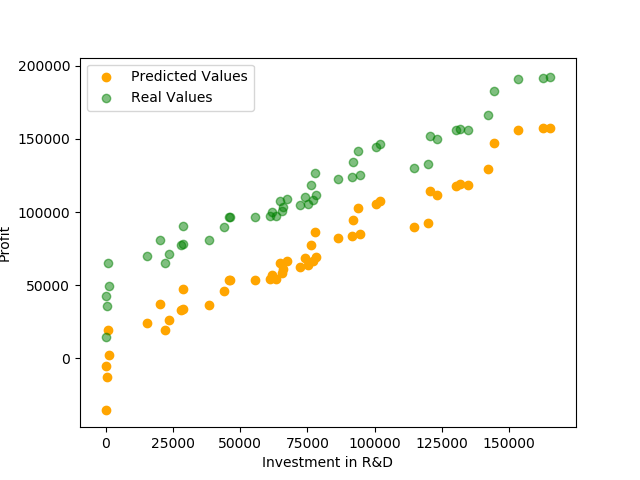

In [113]:
plt.scatter(invertedX,inverted_pred_Y,c='orange',label='Predicted Values')
plt.scatter(invertedX,invertedY,c='green',alpha=0.5,label='Real Values')

plt.xlabel('Investment in R&D')
plt.ylabel('Profit')

plt.legend()
plt.show()

#print(np.corrcoef(rnd_X,profit_Y),np.corrcoef(rnd_X,newY))

<font size=4>5. Create a model with Polynomial kernel and fit the data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
rnd_X = dataset.iloc[:,0:1]
profit_Y = dataset.iloc[:,4:]

In [12]:
scalex = StandardScaler().fit(rnd_X)
scaley = StandardScaler().fit(profit_Y)

rnd_x = scalex.transform(rnd_X)
profit_y = scaley.transform(profit_Y)

In [39]:
polyFit = SVR(kernel='poly',gamma='auto',degree=3).fit(rnd_x,profit_y.ravel())

<font size=4>6. Visualize the scatters and model with Polynomial kernel

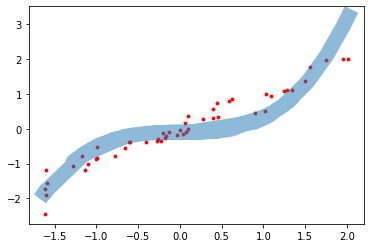

In [40]:
plt.scatter(rnd_x,profit_y,c='red',s=8)
plt.plot(rnd_x,polyFit.predict(rnd_x),lw=15,alpha=0.5)

In [41]:
inverse_pred = scaley.inverse_transform(polyFit.predict(rnd_x))

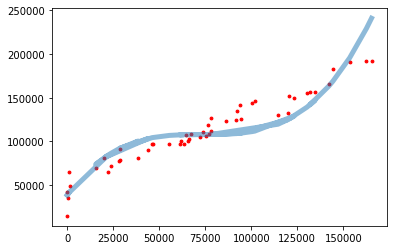

In [42]:
plt.scatter(rnd_X,profit_Y,s=8,c='red')
plt.plot(rnd_X,inverse_pred,lw=5,alpha=0.5)

<font size=4>7. Compute the Score of the model with Polynomial kernel

In [29]:
polyFit.score(rnd_x,profit_y)

0.8198022327279734

<font size=4>8. Create a model with RBF kernel and fit the data

In [44]:
polyRBF = SVR(kernel='rbf',gamma='auto').fit(rnd_x,profit_y.ravel())

<font size=4>9. Visualize the scatters and model with RBF kernel

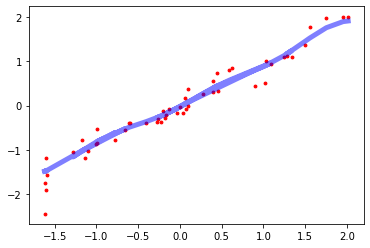

In [46]:
plt.scatter(rnd_x,profit_y,s=8,c='red')
plt.plot(rnd_x,polyRBF.predict(rnd_x),c='blue',lw=5,alpha=0.5)

In [49]:
inverseY = scaley.inverse_transform(polyRBF.predict(rnd_x))

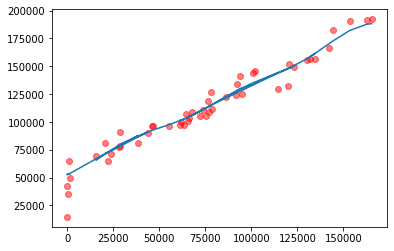

In [53]:
plt.scatter(rnd_X,profit_Y,c='red',alpha=0.5)
plt.plot(rnd_X,inverseY)

<font size=4>10. Compute the Score of the model with RBF kernel

In [48]:
polyRBF.score(rnd_x,profit_y)

0.9510555455428422

<font size=4>11. Compare(conclude) all 3 scores of models and decide which model is the best one

In [56]:
kernels = ['poly','linear','rbf']

for k in kernels:
    fitt = SVR(kernel=k).fit(rnd_x,profit_y.ravel())
    print(f'Kernel: {k}, Score of {fitt.score(rnd_x,profit_y)}')

Kernel: poly, Score of 0.8198022327279734
Kernel: linear, Score of 0.9461755773393699
Kernel: rbf, Score of 0.9510555455428422


Tip: Don't forget to scale your data before fitting into the model

ok

<strong>------------------------------------------------------------------------------------------------------------------------------------------</strong>

### SVR 2D

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVR

In [2]:
data = pd.read_csv(r'C:\Users\User\Downloads\kc_house_data.csv')

data.head()
#data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### Q1

In [8]:
# Creating Variables
x = data.iloc[:1500,3:]
y = data.iloc[:1500,2:3]

##### Q2

In [9]:
# Transform
from sklearn.preprocessing import StandardScaler

x_ssFit = StandardScaler().fit(x)
y_ssFit = StandardScaler().fit(y)

x = x_ssFit.transform(x)
y = y_ssFit.transform(y)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle=False)

In [11]:
linFit = SVR(kernel='linear').fit(x_train,y_train.ravel())
polyFit = SVR(kernel='poly').fit(x_train,y_train.ravel())
rbfFit = SVR(kernel='rbf').fit(x_train,y_train.ravel())

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### Q3

In [12]:
print(linFit.score(x_train,y_train))
print(polyFit.score(x_train,y_train))
print(rbfFit.score(x_train,y_train))

0.6970411044846104
0.9101659423231119
0.8199509960712307


In [13]:
print(linFit.score(x_test,y_test))
print(polyFit.score(x_test,y_test))
print(rbfFit.score(x_test,y_test))

0.5872956220301684
0.8183650569768128
0.3607637387681154


##### Q4

In [21]:
penalties = [1, 10, 100]
epsilons = [0.1,0.2,0.3]

print("Tuning parameters for RVS model with polynomial Kernel")
for c in penalties:
    for e in epsilons:
        model = SVR(kernel='poly', C=c, epsilon=e, gamma='auto').fit(x_train, y_train.ravel())
        train_score = model.score(x_train, y_train.ravel())
        test_score = model.score(x_test, y_test.ravel())
        print(f"Kernel: Polynomial. Penalty: {c}. Epsilon: {e}. Training Score: {train_score}. Test score: {test_score}")

Tuning parameters for RVS model with polynomial Kernel
Kernel: Polynomial. Penalty: 1. Epsilon: 0.1. Training Score: 0.9101659423231119. Test score: 0.8183650569768128
Kernel: Polynomial. Penalty: 1. Epsilon: 0.2. Training Score: 0.9064527369403181. Test score: 0.83950797763684
Kernel: Polynomial. Penalty: 1. Epsilon: 0.3. Training Score: 0.8906561386370626. Test score: 0.827973000688393
Kernel: Polynomial. Penalty: 10. Epsilon: 0.1. Training Score: 0.9477381607219026. Test score: 0.34360540387032035
Kernel: Polynomial. Penalty: 10. Epsilon: 0.2. Training Score: 0.9382052294837632. Test score: 0.6376390450297317
Kernel: Polynomial. Penalty: 10. Epsilon: 0.3. Training Score: 0.9189024348710957. Test score: 0.7237362602398507
Kernel: Polynomial. Penalty: 100. Epsilon: 0.1. Training Score: 0.9679562219835028. Test score: -4.311418736994203
Kernel: Polynomial. Penalty: 100. Epsilon: 0.2. Training Score: 0.9549533410988794. Test score: -0.9748977564140151
Kernel: Polynomial. Penalty: 100. E

Best one: Kernel: Polynomial. Penalty: 1. Epsilon: 0.2. <br>
Training Score: 0.9064527369403181. Test score: 0.83950797763684

In [25]:
ultimateModel = SVR(kernel='poly',C=1,epsilon=0.2,gamma='auto').fit(x_train,y_train.ravel())

In [33]:
feature = data.columns
rangeMin = []; rangeMax = []

for i in feature:
    rangeMin.append(data[i].min())
    rangeMax.append(data[i].max())

print(rangeMin,rangeMax)

[1000102, '20140502T000000', 75000.0, 0, 0.0, 290, 520, 1.0, 0, 0, 1, 1, 290, 0, 1900, 0, 98001, 47.1559, -122.51899999999999, 399, 651] [9900000190, '20150527T000000', 7700000.0, 33, 8.0, 13540, 1651359, 3.5, 1, 4, 5, 13, 9410, 4820, 2015, 2015, 98199, 47.7776, -121.315, 6210, 871200]


In [61]:
# Random prediction cuz im lazy
random_var = []

for minn in rangeMin[3:]:
    for maxx in rangeMax[3:]:
        #print(int(maxx))
        if minn>0:
            random_var.append(np.random.randint(int(minn),int(maxx)))
        
random_var

ValueError: Range cannot be empty (low >= high) unless no samples are taken

In [52]:
print(rangeMax[3:],rangeMin[3:])

for low,high in zip(rangeMin[3:],rangeMax[3:]):
    if high<low:
        print('nANI')
    else:
        print('ok')
    

[33, 8.0, 13540, 1651359, 3.5, 1, 4, 5, 13, 9410, 4820, 2015, 2015, 98199, 47.7776, -121.315, 6210, 871200] [0, 0.0, 290, 520, 1.0, 0, 0, 1, 1, 290, 0, 1900, 0, 98001, 47.1559, -122.51899999999999, 399, 651]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
